In [47]:
#importing important liabries 
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings

# To ignore all warnings (not recommended unless you are sure)
warnings.filterwarnings("ignore")

In [48]:
# Load the dataset from the CSV file
data = pd.read_csv('Fatala-Police-Killing-in-the-USA_main_fatal_police_killings_in_the_USA_DownloadedData_fatal-police-shootings-data.csv')
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [49]:
#Explore dataset statistics
data.describe()

,id,age,longitude,latitude
count,7662.000000,7198.000000,6832.000000,6832.000000
mean,4232.256983,37.154210,-97.056950,36.669658
std,2392.923808,12.944269,16.597978,5.394650
min,3.000000,2.000000,-160.007000,19.498000
25%,2148.250000,27.000000,-112.042250,33.480000
50%,4256.500000,35.000000,-94.242000,36.095500
75%,6306.750000,45.000000,-83.083250,40.025250
max,8336.000000,92.000000,-67.867000,71.301000


In [50]:
#Check for missing values
data.isnull().sum()

id                            0
name                        399
date                          0
manner_of_death               0
armed                       209
age                         464
gender                       18
race                       1424
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        853
body_camera                   0
longitude                   830
latitude                    830
is_geocoding_exact            0
dtype: int64

In [51]:
# Handle missing values (if any)
# For simplicity, removing rows with missing values  
data = data.dropna()

In [52]:
#now all the null values are removed 
data.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
longitude                  0
latitude                   0
is_geocoding_exact         0
dtype: int64

In [53]:
#Check the data types of each column in the DataFrame
data.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
longitude                  float64
latitude                   float64
is_geocoding_exact            bool
dtype: object

In [54]:
# Removes duplicate rows
data.drop_duplicates(inplace=True) 

In [55]:
# Select relevant features for clustering
features = data[['age', 'longitude', 'latitude']]

# Standardize the features (important for clustering algorithms)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

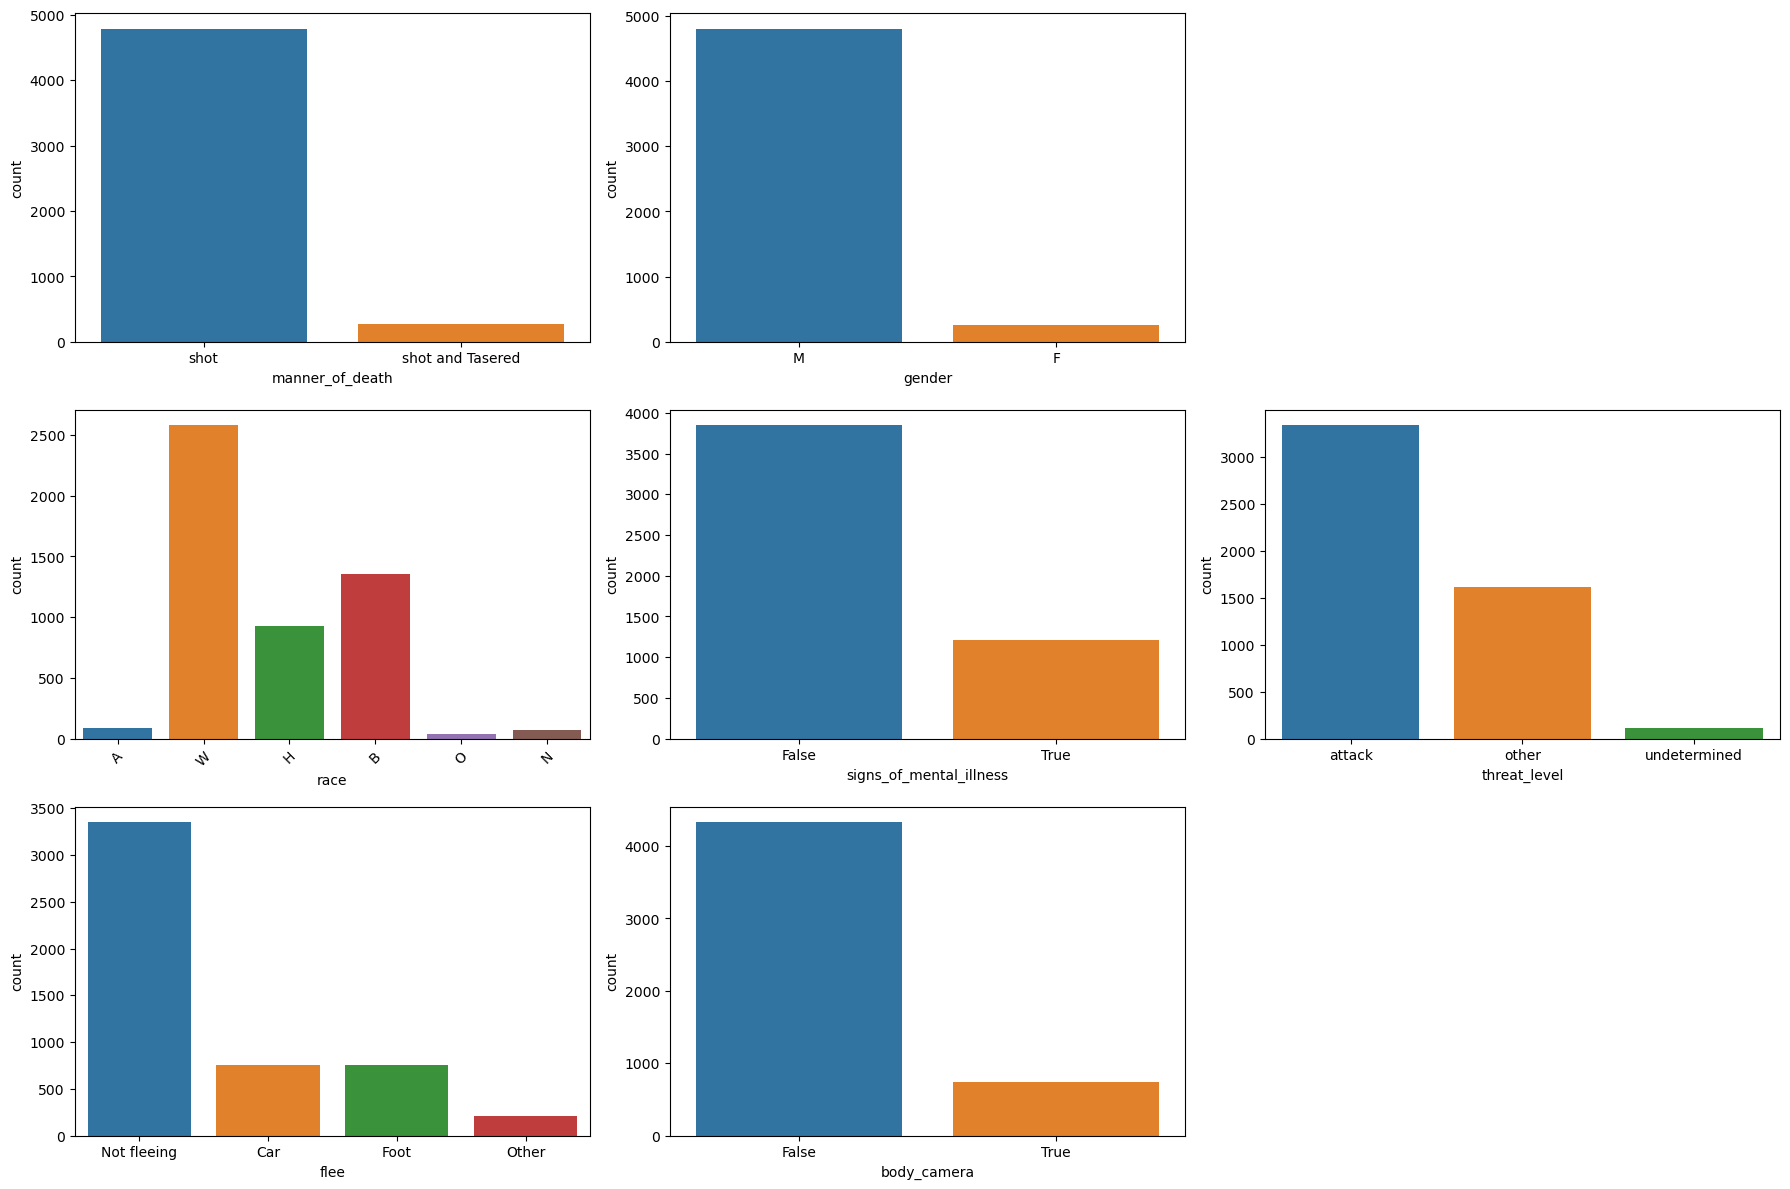

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for categorical columns
plt.figure(figsize=(18, 12))
plt.subplot(3, 3, 1)
sns.countplot(x='manner_of_death', data=data)
plt.subplot(3, 3, 2)
sns.countplot(x='gender', data=data)
plt.subplot(3, 3, 4)
sns.countplot(x='race', data=data)
plt.xticks(rotation=45)
plt.subplot(3, 3, 5)
sns.countplot(x='signs_of_mental_illness', data=data)
plt.subplot(3, 3, 6)
sns.countplot(x='threat_level', data=data)
plt.subplot(3, 3, 7)
sns.countplot(x='flee', data=data)
plt.subplot(3, 3, 8)
sns.countplot(x='body_camera', data=data)
plt.tight_layout()
plt.show()


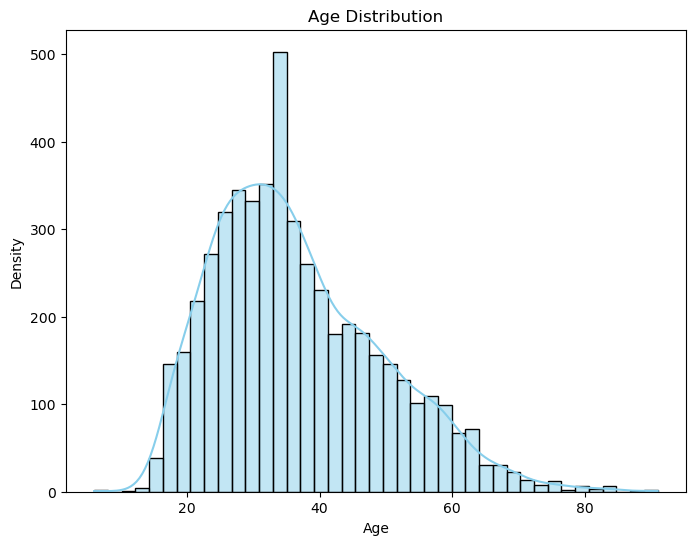

In [65]:
# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution')
plt.show()

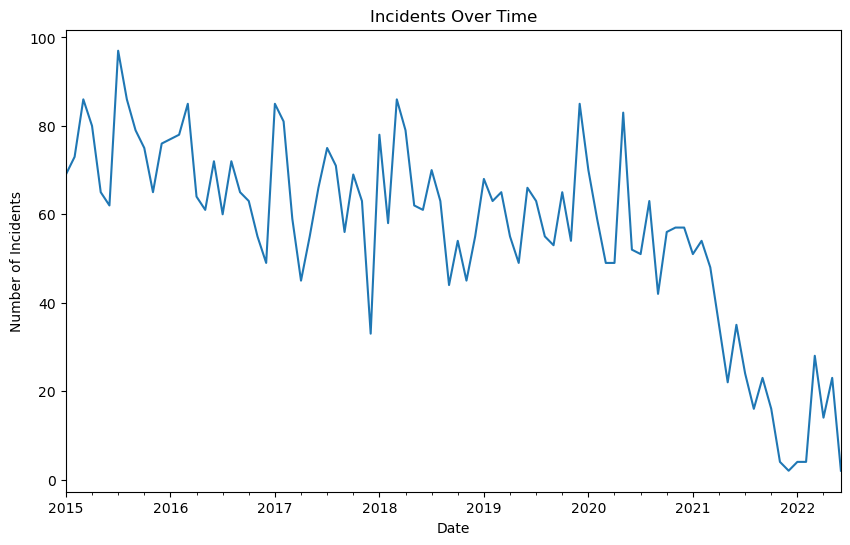

In [66]:
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Incidents over time
plt.figure(figsize=(10, 6))
data.set_index('date').resample('M').size().plot()
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.title('Incidents Over Time')
plt.show()

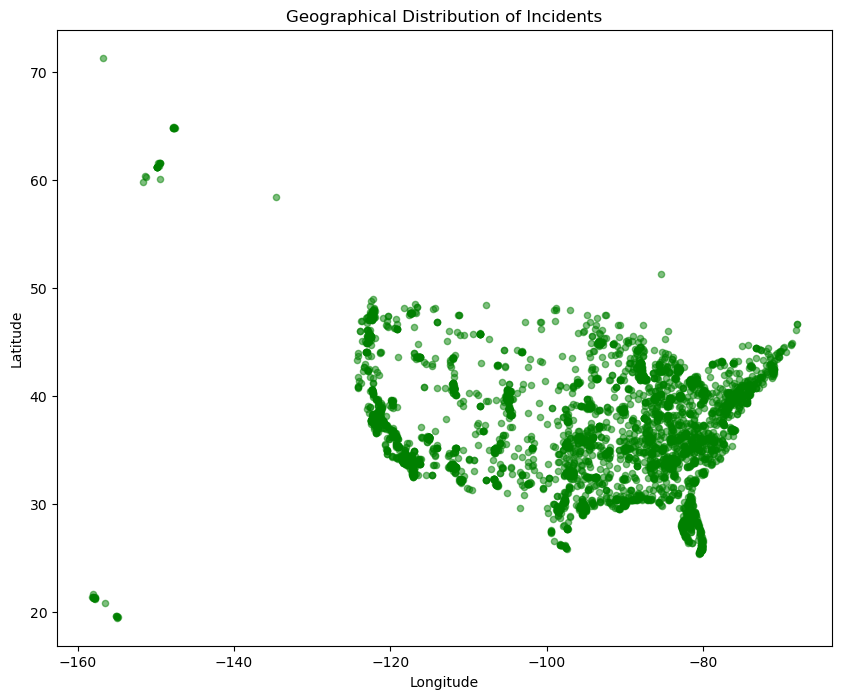

In [67]:
# Geographical distribution of incidents
plt.figure(figsize=(10, 8))
plt.scatter(data['longitude'], data['latitude'], s=20, color='green', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Incidents')
plt.show()

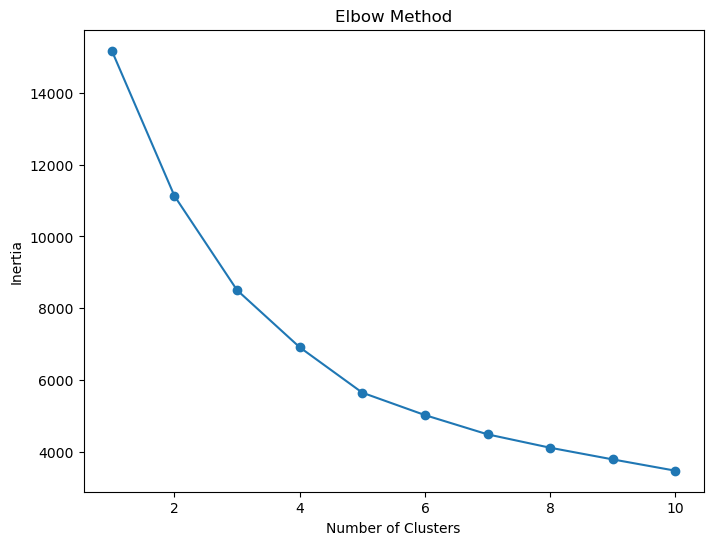

In [56]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    
# Plot the Elbow Method to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()



# Based on the Elbow Method, choose the optimal number of clusters (let's say k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)


# Add the cluster labels to the original dataset
data['cluster'] = clusters

In [57]:
# Now, 'data' contains an additional column 'cluster' indicating the cluster each incident belongs to
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,cluster
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,2
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,2
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,1
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,2
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True,2
